# Exercise

## Section2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1：Habbard atom

In [2]:
Gz = lambda z,U=1.0 : (1.0/2.0)*(1.0/(z - U/2) + 1.0/(z + U/2))
Gt = lambda t,b,U=1.0 : -(1.0/2.0)*(np.exp(-t*U/2)/(1.0 + np.exp(-b*U/2.0)) + np.exp(t*U/2)/(1.0 + np.exp(b*U/2.0)))

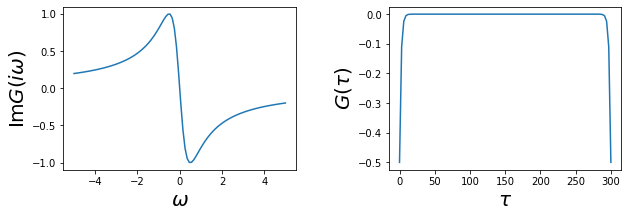

In [3]:
beta = 300
omegas = np.linspace(-5.0 , 5.0 , 100)
taus = np.linspace(0.0 , beta , 100)


fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(wspace=0.4)

ax1 = fig.add_subplot(121)
ax1.plot(omegas , np.imag(Gz(1J*omegas)))
ax1.set_xlabel(r"$\omega$" , size=20)
ax1.set_ylabel(r"$\mathrm{Im}G(i\omega)$", size=20)

ax2 = fig.add_subplot(122)
ax2.plot(taus , Gt(taus , beta))
ax2.set_xlabel(r"$\tau$" , size=20)
ax2.set_ylabel(r"$G(\tau)$", size=20)

plt.show()

### Exercise 2：Habbard atomのGreen関数

#### (22)式の導出
エネルギー固有状態を$|0\rangle, c_{\uparrow}^\dagger|0\rangle, c_{\downarrow}^\dagger |0\rangle, c_{\uparrow}^\dagger c_{\downarrow}^\dagger|0\rangle$のようにとったとき、$c_{\uparrow}^\dagger , c_{\downarrow}^\dagger$の行列要素は以下のようになる。
\begin{align*}
(c_{\uparrow}^\dagger)_{a , b} &= 1 \qquad \textrm{for } (a,b) = (\uparrow , 0) , (\uparrow\downarrow , \downarrow) \\
(c_{\uparrow}^\dagger)_{a , b} &= 0 \qquad \textrm{otherwise}
\end{align*}

\begin{align*}
\left(c_{\downarrow}^\dagger\right)_{a , b} &= 1 \qquad \textrm{for } (a,b) = (\downarrow , 0) \\
\left(c_{\downarrow}^\dagger\right)_{a , b} &= -1 \qquad \textrm{for} (a,b) = (\uparrow\downarrow , \uparrow) \\
\left(c_{\downarrow}^\dagger\right)_{a , b} &= 0 \qquad \textrm{otherwise}
\end{align*}
ここで
$$
\rho_{\sigma\sigma'}(\omega) = \frac{1}{Z} \sum_{n,m} (e^{-\beta E_n} + e^{-\beta E_m}) (c_{\sigma})_{nm} (c_{\sigma'}^\dagger)_{mn} \delta(\omega - (E_n - E_m)),
$$
を用いるとスペクトル関数は
$$
\rho_{\sigma \sigma'}(\omega) = \frac{1}{2}[\delta(\omega - U/2) + \delta(\omega + U/2)] \delta_{\sigma \sigma'}.
$$
となる。よってGreen関数
\begin{align*}
G_{\sigma\sigma'}(z) 
&= \int d\omega \frac{\rho_{\sigma\sigma'}(\omega)}{z - \omega} \\
&= \frac{1}{2}\left(\frac{1}{z-U/2} + \frac{1}{z+U/2}\right)\delta_{\sigma\sigma'}.
\end{align*}
を得る。

#### (23)式の導出（問題）
\begin{align*}
G_{\sigma \sigma'}(\tau)
&= \frac{1}{\beta} \sum_n G_{\sigma \sigma'}(i\omega_n) e^{-i\omega_n \tau} \\
&= \frac{1}{2} \frac{1}{\beta} \sum_n \left(\frac{e^{-i\omega_n \tau}}{i\omega_n - U/2} + \frac{e^{-i\omega_n \tau}}{i\omega_n + U/2}\right)\delta_{\sigma\sigma'}
\end{align*}
(24)式を用いると
$$
G_{\sigma \sigma'}(\tau)
= -\frac{1}{2} \left(\frac{e^{-\tau U/2}}{1 + e^{-\beta U/2}} + \frac{e^{\tau U/2}}{1 + e^{\beta U/2}} \right) \delta_{\sigma\sigma'}
$$


### Exercise 3：逆Fourier変換
松原和の足しあげにカットオフを入れる　　

$N=100$と$N=1000$で$\tau=0$付近を比較

In [4]:
def Gt_uni(t , b , N , U=1.0):
    t = t.reshape(1,len(t))
    n = np.arange(-N,N+1)
    oms = (2.0*n + 1.0)*np.pi/b
    om = oms.reshape(1,len(oms))
    phi = t.T@om
    Exp = np.exp(-1J*phi)
    g = (1/b)*np.einsum("tw,w->t",Exp,Gz(1J*oms),optimize=True).real
    return g

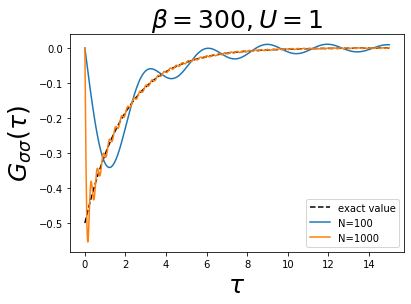

In [5]:
beta = 300.0
taus = np.linspace(0.0 , beta*0.05 , 10000)
plt.plot(taus , Gt(taus , beta) , label="exact value" , color="black" , ls="--")
for N in [100 , 1000]:
    plt.plot(taus , Gt_uni(taus , beta , N) , label=f"N={N:d}")
plt.title(r"$\beta=300, U=1$" , size=25)
plt.xlabel(r"$\tau$",size=25)
plt.ylabel(r"$G_{\sigma \sigma}(\tau)$",size=25)
plt.legend()
plt.show()

## Section 3
### Exercise 4：補間
線形補間とキュービックスプライン

---
- 補間：`scipy.interpolate.interp1d(x , y , kind='linear')`　データ$(x,y)$を補間（`kind='linear'`で線形補間、`kind='cubic'`でキュービックスプライン）

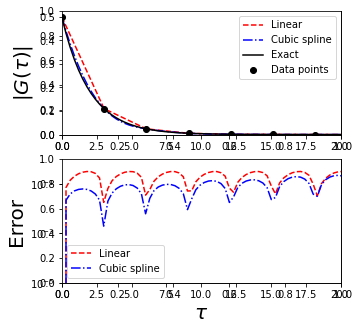

In [6]:
from scipy.interpolate import interp1d

Nt = 1000
Nt_i = 100

taus_i = np.linspace(0.0, beta, Nt_i)
taus = np.linspace(0.0, beta, Nt)

gt_i = Gt(taus_i , beta)
gt = Gt(taus, beta)

gt_linear = interp1d(taus_i, gt_i, kind='linear')(taus)
gt_cubic = interp1d(taus_i, gt_i, kind='cubic')(taus)

error_lin = np.abs(gt_linear - gt)/np.abs(gt)
error_cube = np.abs(gt_cubic - gt)/np.abs(gt)

fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1 = fig.add_subplot(211)
ax1.plot(taus, np.abs(gt_linear), ls="--", label="Linear", color="r")
ax1.plot(taus, np.abs(gt_cubic), ls="-.", label="Cubic spline", color="b")
ax1.plot(taus, np.abs(gt), ls="-", marker="", label="Exact", color="k")
ax1.plot(taus_i, np.abs(gt_i), ls="", marker="o", label="Data points", color="k")

ax1.set_ylabel(r'$|G(\tau)|$',size=20)
ax1.set_xlim(0,20)
ax1.set_ylim(0)
ax1.set_xlabel(r'$\tau$',size=20)
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.semilogy(taus, error_lin, ls="--", label="Linear", color="r")
ax2.semilogy(taus, error_cube, ls="-.", label="Cubic spline", color="b")

ax2.set_ylabel("Error",size=20)
ax2.set_xlabel(r"$\tau$",size=20)
ax2.set_xlim(0,20)
ax2.set_ylim(1e-5,1)
ax2.legend()

plt.show()

### Exercise 5
#### - 高周波数側でうまくいかない理由
高周波数側の減衰がベキ減衰で遅いのため。

#### - 逆Fourier変換の松原和に対する$\omega_n$のカットオフ
uniform meshの場合、$e^{i\omega_n \tau}$の振動の速度の条件から、$\omega_{\rm max} \sim N_\tau/\beta$程度。  

Gauss-Legendre求積法の場合、
\begin{align*}
x_{\nu n} - x_{\nu - 1 , n} &= \cos{\theta_{\nu n}} - \cos{\theta_{\nu - 1, n}} \\
&= -2\sin\left(\frac{\theta_{\nu n} + \theta_{\nu - 1, n}}{2}\right) 
\sin\left(\frac{\theta_{\nu n} - \theta_{\nu - 1, n}}{2}\right) \\
&\simeq -2 \sin\left(\frac{2\nu - 1}{2(n+1)}\pi\right) 
\sin\left(\frac{-1}{2(n+1)}\pi\right) \\
&\simeq 2 \sin\left(\frac{2\nu - 1}{2(n+1)}\pi\right) 
\frac{1}{n}
\end{align*}
$1 \leq \nu \leq n/2$なので
\begin{align*}
\mathcal{O}(1/n^2) \lesssim x_{\nu n} - x_{\nu - 1 , n} \lesssim \mathcal{O}(1/n)
\end{align*}
Fig.5の条件のもと、$\mathcal{O}(1/n^2),\mathcal{O}(1/n)$それぞれのオーダーで評価すると
\begin{align*}
\omega_{\rm max} &\sim  \frac{n^2}{\beta} \sim \frac{1000^2}{100} = 10^4 \\
\omega_{\rm max} &\sim  \frac{n}{\beta} \sim \frac{1000}{100} = 10^1
\end{align*}
Fig.5を見ると、$\omega_n \sim 10^1$程度で精度が悪くなるので、$x_{\nu n} - x_{\nu - 1 , n} \sim \mathcal{O}(1/n)$となる$\nu \sim \pi/2$でのふるまいでカットオフが決まっていると考えられる。


#### - 改善方法
高周波数展開の結果がわかっている場合には先に$1/i\omega_n$に比例した項を取り除くことで精度を高めることができる。

### Exercise 6：高周波数展開を利用した逆Fourier変換
高周波数展開の結果がわかっているものとして、$1/i\omega_n$に比例する項を先に除いてから逆Fourier変換
$$
\tilde G(i\omega_n) \equiv G(i\omega_n) - \frac{1}{i\omega_n} \\
G(\tau) \simeq \sum_{n = -n_{\rm max}}^{n_{\rm max}} e^{-i\omega_n \tau} \tilde G(i\omega_n) - \frac{1}{2}
$$

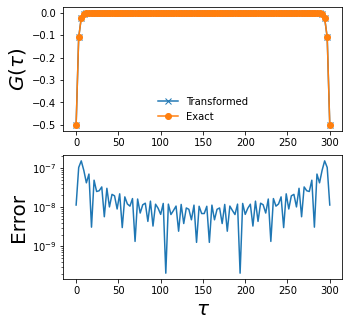

In [7]:
beta = 300

taus = np.linspace(0 , beta , 100)
gt_exact = Gt(taus , beta)

odd_nums = 2*np.arange(-2000, 2001)+1
oms = odd_nums*np.pi/beta

tgom = Gz(1J*oms) - 1/(1J*oms)
phi = taus.reshape(1,len(taus)).T@oms.reshape(1,len(oms))
exp= np.exp(-1J*phi)
gt_approx = (1/beta)*np.einsum("to,o->t",exp,tgom) - 1/2


fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.plot(taus , np.real(gt_approx), label='Transformed', marker='x')
ax1.plot(taus, gt_exact , label='Exact', marker='o')
ax1.legend(frameon=False, loc='best')
ax1.set_ylabel(r'$G(\tau)$' , size=20)

ax2.semilogy(taus , np.abs(gt_exact-gt_approx), marker='', ls='-')
ax2.set_xlabel(r'$\tau$' , size=20)
ax2.set_ylabel(r'Error' , size=20)
plt.show()

## Section 4
### Exercise 7：Legendre基底
Legendre基底で展開
$$
G(\tau) = \sum_{l = 0}^\infty \frac{\sqrt{2l + 1}}{\beta} P_l(x(\tau)) G_l \\
G_l = \sqrt{2l + 1} \int_0^\beta d\tau P_l(x(\tau)) G(\tau)
$$
ただし、$x(\tau) = 2\tau/\beta - 1$。


---
- Legendre多項式：`scipy.special.eval_legendre(n,x)`　点$x$における$n$次のLegendre多項式

time=0.9264700412750244


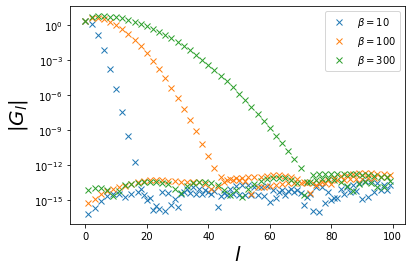

In [8]:
from scipy import integrate
from scipy.special import eval_legendre
from time import time

st = time()

betas = [10,100,300]

N = 100
lvec = np.arange(N)
for b in betas:
    gl = [integrate.quad(lambda t: np.sqrt(2.0*l + 1.0)*eval_legendre(l,2.0*t/b - 1)*Gt(t , b) , 0 , b)[0] for l in lvec]
    plt.semilogy(lvec, np.abs(gl), marker='x', ls='', label=r"$\beta=$" + str(b))
plt.xlabel(r'$l$' , size=20)
plt.ylabel(r'$|G_l|$' , size=20)
plt.legend()

print("time=" + str(time() - st))

Gauss-Legendre求積法
$$
\int_{-1}^1 f(x)dx = \sum_{n=1}^N f(x_n) w_n
$$
---
- Gauss-Legendre求積法：`numpy.polynomial.legendre.leggauss(N)`　$N$個の点でのGauss-Legendre求積法の標本点と重み（return 標本点x,重みy）

beta= 300


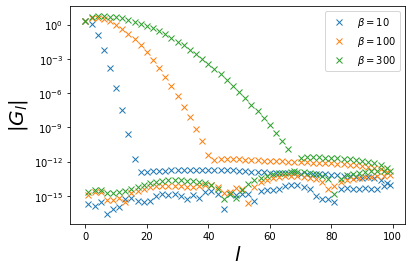

time=0.47964906692504883


In [9]:
from numpy.polynomial.legendre import leggauss
from scipy.special import eval_legendre
from time import time

st = time()

N = 100
x, y = leggauss(deg=N)

lvec = np.arange(N)
legg_val = eval_legendre(lvec[None,:], x[:,None])

print("beta=", beta)
for b in betas:
    taus_leggauss = b * (x+1)/2
    weights_leggauss = (b/2) * y
    gtau_val = Gt(taus_leggauss , b)
    gl = np.einsum('l,tl,t,t->l',np.sqrt(2*lvec+1),legg_val,gtau_val,weights_leggauss, optimize=True)
    plt.semilogy(lvec, np.abs(gl), marker='x', ls='', label=r"$\beta=$" + str(b))
plt.xlabel(r'$l$' , size=20)
plt.ylabel(r'$|G_l|$' , size=20)
plt.legend() 
plt.show()

print("time=" + str(time() - st))

## Section 5
### Exercise 8：カーネルの特異値分解
もとのスペクトル関数に3つのGaussianのピークを持つ左のグラフものを選ぶ。
このとき、$\omega$の点数を$N_{\omega} = 1000$、カットオフを$\omega_{\rm max} = 10$として、
$$
G(\tau_i) = -\frac{2\omega_{\rm max}}{N_\omega} \sum_j K(\tau_i , \omega_j) \rho(\omega_j) \tag{*}
$$
によって計算された$G(\tau)$を$\tau$の点数$N_\tau = 1000$取得できたとする（右のグラフ）。この$G(\tau)$は数値的に取得できたものを想定。

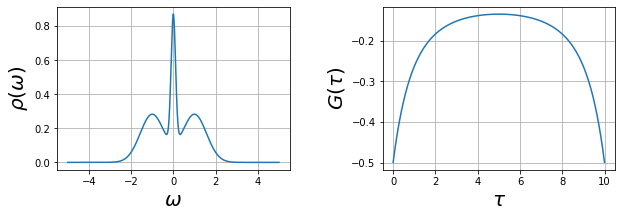

In [10]:
beta = 10.0
oms = np.linspace(-5 , 5 , 1000)

gaussian = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2)/(np.sqrt(np.pi)*sigma)
rho = lambda omega: 0.2*gaussian(omega, 0.0, 0.15) + 0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)


ommax = 10.0
nom = 1000
oms_mesh = np.linspace(-ommax, ommax, nom)
ntau = 1000
taus_mesh = np.linspace(0, beta, ntau)

kernel = lambda tau, omega: np.exp(-tau*omega)/(1 + np.exp(-beta*omega))

K_mat = kernel(taus_mesh[:,None], oms_mesh[None,:])
gt = (-2*ommax/nom)*K_mat@rho(oms_mesh)


fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(wspace=0.4)

ax1 = fig.add_subplot(121)
ax1.plot(oms, rho(oms))
ax1.set_xlabel(r'$\omega$' , size=20)
ax1.set_ylabel(r'$\rho(\omega)$' , size=20)
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(taus_mesh, gt)
ax2.set_xlabel(r'$\tau$' , size=20)
ax2.set_ylabel(r'$G(\tau)$', size=20)
ax2.grid()
plt.show()

取得した$G(\tau)$の値からスペクトル関数を作る。
さらに、作ったスペクトル関数をもとに(*)式を用いて$G(\tau)$を作る。

---
- 擬似逆行列：`numpy.linalg.pinv(A , rcond=1e-15)`　行列$A$の擬似逆行列（特異値のカットオフ`rcond`）

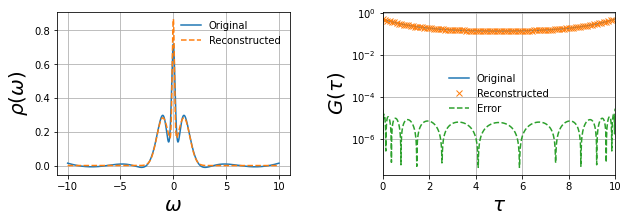

In [11]:
rho_reconst = -  (nom/(2*ommax)) * np.linalg.pinv(K_mat, rcond=1e-3) @ gt

gt_reconst = (-2*ommax/nom)*K_mat@rho_reconst

fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(wspace=0.4)

ax1 = fig.add_subplot(121)
ax1.plot(oms_mesh, rho_reconst, label='Original')
ax1.plot(oms_mesh, rho(oms_mesh), ls='--', label='Reconstructed')
ax1.set_xlabel(r'$\omega$',size=20)
ax1.set_ylabel(r'$\rho(\omega)$',size=20)
ax1.grid()
ax1.legend(frameon=False)

ax2 = fig.add_subplot(122)
ax2.set_xlabel(r'$\tau$' , size=20)
ax2.set_ylabel(r'$G(\tau)$' , size=20)
ax2.set_xlim([0,beta])
ax2.grid()
ax2.plot(taus_mesh, -gt, label='Original')
ax2.plot(taus_mesh[::10], -gt_reconst[::10], label='Reconstructed', ls='', marker='x')
ax2.plot(taus_mesh, np.abs(gt-gt_reconst), ls='--', marker='', label='Error')
ax2.legend(frameon=False)
ax2.set_yscale("log")

(*)式をベクトル、行列と見て
$$
\boldsymbol{g} = -\boldsymbol{K} \boldsymbol{\rho}
$$
と書く。ただし、$\boldsymbol{K}_{ij} = (2\omega_{\rm max}/N_\omega) K(\tau_i , \omega_i)$。$\boldsymbol{K}$の特異値分解
$$
\boldsymbol{K} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^\dagger
$$
を用いて
$$
g_i = -s_i \rho_i , \qquad (g_i = u_i^\dagger \boldsymbol{g} , \ \rho_i = v_i^\dagger \boldsymbol{\rho})
$$
と変形する。このとき、$i$を大きい方から何点選ぶかで$G(\tau)$の精度がどう変化するかを見る。

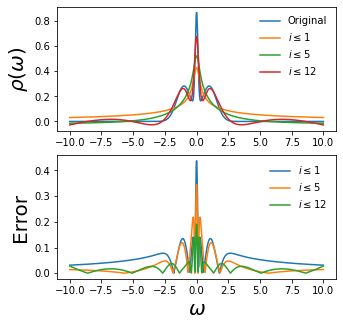

In [12]:
K = (2*ommax/nom)*K_mat
u, s, vd = np.linalg.svd(K)

rho_i = vd@rho(oms_mesh)

fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

rho_exact = rho(oms_mesh)

ax1.plot(oms_mesh, rho_exact , label='Original')
for num_comp in [1 , 5 , 12]:
    rho_reconst = np.einsum('wi,i->w', vd[:num_comp].T , rho_i[:num_comp])
    ax1.plot(oms_mesh, rho_reconst, label="$i\leq$" + str(num_comp))
    ax2.plot(oms_mesh, np.abs(rho_reconst - rho_exact) , label="$i\leq$" + str(num_comp))
ax1.set_ylabel(r"$\rho(\omega)$",size=20)
ax1.legend(frameon=False)
ax2.set_xlabel(r"$\omega$",size=20)
ax2.set_ylabel("Error",size=20)
ax2.legend(frameon=False)
plt.show()

## Section 6
### Exercise 9：IR基底

カーネルをIR基底で展開
$$
K(\tau , \omega) = \sum_{l = 0}^\infty U_l(\tau) S_l V_l(\omega)
$$

フェルミオン（`statistics="F"`）に対しては以下で基底を取得
```python
lambda_ = 100
beta = 10
K = irbasis3.KernelFFlat(lambda_=100)
basis = irbasis3.FiniteTempBasis(K, statistics="F", beta=beta, eps=1e-10)
```
$S_l$は以下で取得
```python
basis.s
```
$U_l , V_l$は以下で取得
```python
basis.u
basis.v
```

引き続き以下のスペクトル関数を考える。

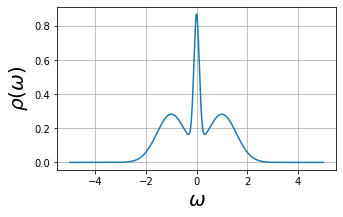

In [13]:
gaussian = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2)/(np.sqrt(np.pi)*sigma)
rho = lambda om: 0.2*gaussian(om, 0.0, 0.15) + 0.4*gaussian(om, 1.0, 0.8) + 0.4*gaussian(om, -1.0, 0.8)
oms = np.linspace(-5, 5, 1000)

fig = plt.figure(figsize=(5,3))
fig.subplots_adjust(wspace=0.4)

ax1 = fig.add_subplot(111)
ax1.plot(oms, rho(oms))
ax1.set_xlabel(r'$\omega$' , size=20)
ax1.set_ylabel(r'$\rho(\omega)$' , size=20)
ax1.grid()

$g_l = -s_l \rho_l$を用いて$g_l$を計算

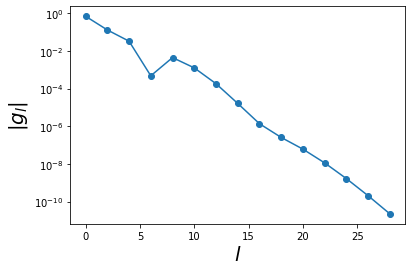

In [14]:
import irbasis3

#基底を取得
lambda_ = 100
beta = 10
K = irbasis3.KernelFFlat(lambda_=100)
basis = irbasis3.FiniteTempBasis(K, statistics="F", beta=beta, eps=1e-10)

#V_lを取得し、rho_lを計算
rho_l = basis.v.overlap(rho)

#S_lを取得し、G_lを計算
g_l = -basis.s*rho_l

plt.semilogy(np.arange(0,basis.size,2), np.abs(g_l[::2]), marker='o')
plt.xlabel(r'$l$',size=20)
plt.ylabel(r'$|g_l|$', size=20)
plt.show()

$g_l = u_l^\dagger \boldsymbol{g}$を用いて$G(\tau)$を計算

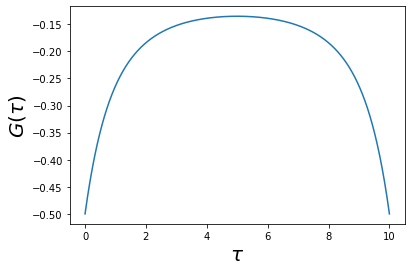

In [15]:
def Gt_ir(t):
    uval = basis.u(t)
    return uval.T@g_l

taus = np.linspace(0, beta, 1000)
gt = Gt_ir(taus)

plt.plot(taus, gt)
plt.xlabel(r"$\tau$" , size=20)
plt.ylabel(r"$G(\tau)$" , size=20)
plt.show()

## Section 7
### Exercise 10：スパースサンプリング($\tau$)

$\tau$サンプリング
```python
irbasis3.TauSampling(basis)
```

Condition number:  5.897702173686458
Condition number (random):  1.4216233064618612e+16
Condition number (uniform mesh):  29141951701.728844


/Users/tatsuya/python_env/py3env/lib/python3.8/site-packages/irbasis3/sampling.py:40: ConditioningWarning: Sampling matrix is poorly conditioned (cond = 1.4e+16)
  warn("Sampling matrix is poorly conditioned (cond = %.2g)"
/Users/tatsuya/python_env/py3env/lib/python3.8/site-packages/irbasis3/sampling.py:40: ConditioningWarning: Sampling matrix is poorly conditioned (cond = 2.9e+10)
  warn("Sampling matrix is poorly conditioned (cond = %.2g)"


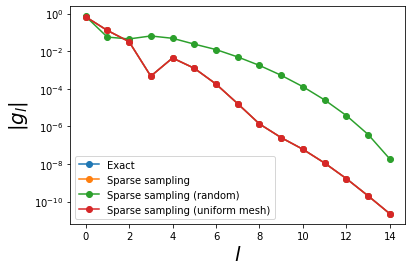

In [16]:
uniform = np.linspace(0, beta, basis.size)

plt.semilogy(np.abs(g_l[::2]), marker="o" , label="Exact")

smpl = irbasis3.TauSampling(basis)
print("Condition number: ", smpl.cond)
gl_reconst_sparse = smpl.fit(Gt_ir(smpl.sampling_points))
plt.semilogy(np.abs(gl_reconst_sparse[::2]), marker='o', label="Sparse sampling")

my_smpl_points = [ np.random.rand(basis.size)*beta , uniform]
labels = ["random" , "uniform mesh"]
for num in range(len(my_smpl_points)):
    point = my_smpl_points[num]
    smpl = irbasis3.TauSampling(basis, sampling_points=point)
    print( "Condition number (" + labels[num] + "): ", smpl.cond)
    gl_reconst_sparse = smpl.fit(Gt_ir(smpl.sampling_points))
    plt.semilogy(np.abs(gl_reconst_sparse[::2]), marker='o', label="Sparse sampling (" + labels[num] + ")")

plt.xlabel(r"$l$",size=20)
plt.ylabel(r"$|g_l|$",size=20)
plt.legend()
plt.show()

### Exercise11：スパースサンプリング($\omega_n$)

$\omega_n$サンプリング
```python
irbasis3.MatsubaraSampling(basis)
```

Condition number:  11.274068842692673
Condition number (uniform mesh):  2080895.3127089303


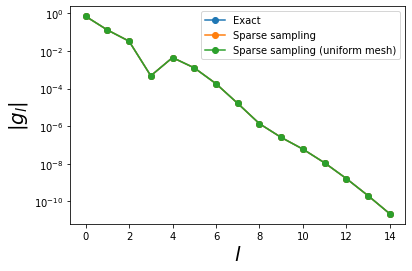

In [17]:
def Gt_ir2(v):
    uhat_val = basis.uhat(v)
    return uhat_val.T@g_l

uniform = np.arange(basis.size) - basis.size//2

plt.semilogy(np.abs(g_l[::2]), marker="o" , label="Exact")

smpl_matsu = irbasis3.MatsubaraSampling(basis)
print("Condition number: ", smpl_matsu.cond)
gl_reconst_sparse_matsu = smpl_matsu.fit(Gt_ir2(smpl_matsu.sampling_points))
plt.semilogy(np.abs(gl_reconst_sparse_matsu[::2]), marker='o', label="Sparse sampling")


my_smpl_points = 2*uniform + 1
smpl_matsu_uni = irbasis3.MatsubaraSampling(basis, sampling_points=my_smpl_points)
print( "Condition number (uniform mesh): ", smpl_matsu_uni.cond)
gl_reconst_sparse_matsu_uni = smpl_matsu_uni.fit(Gt_ir2(smpl_matsu_uni.sampling_points))
plt.semilogy(np.abs(gl_reconst_sparse_matsu_uni[::2]), marker='o', label="Sparse sampling (uniform mesh)")

plt.xlabel(r"$l$",size=20)
plt.ylabel(r"$|g_l|$",size=20)
plt.legend()
plt.show()